<a href="https://colab.research.google.com/github/BoHye0202/Kaggle/blob/main/Titanic_1_case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url_train = 'https://raw.githubusercontent.com/BoHye0202/Kaggle/main/1.Titanic/data/train.csv'
url_test = 'https://raw.githubusercontent.com/BoHye0202/Kaggle/main/1.Titanic/data/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [9]:
# 어느 코드에서나 기본세팅 (matplotlib 기본설정값 대신 사용) 
plt.style.use('seaborn') # 항상 사용 
sns.set(font_scale=2.5) # 항상 사용

# 결측데이터를 시각화해서 보여준다
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2. Dataset 확인

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2-1.Null Data Check
**사용 Feature**

Pclass, Age, SibSp, Parch, Fare

**Target Label**

Survived

### Null Data Check 1
train, test set: describe
count를 보면 null data가 존재하는 것 같다

In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null Data Check 2
- Train set과 Test set에서 Age와 Cabin이 비슷한 수치로 null data 존재
- Train set에만 Embarked 0.22% null data 존재

In [18]:
# Train set
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [21]:
# Test set
for col in df_test.columns:
  msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 20.57%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.24%
column:      Cabin	 Percent of Nan value: 78.23%
column:   Embarked	 Percent of Nan value: 0.00%


### Null Data Check 3

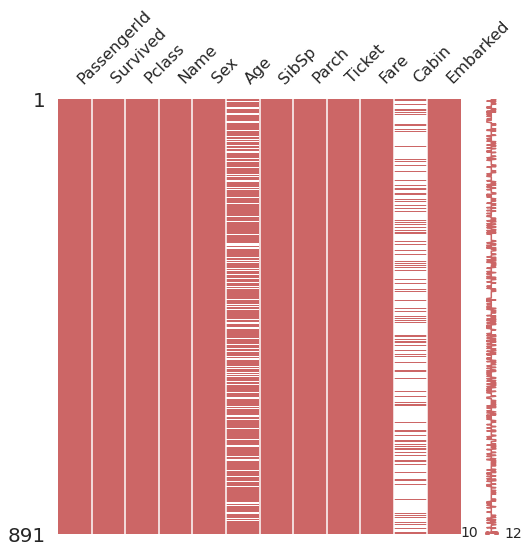

In [23]:
msno.matrix(df=df_train.iloc[:,:],figsize = (8,8), color=(0.8, 0.4,0.4));

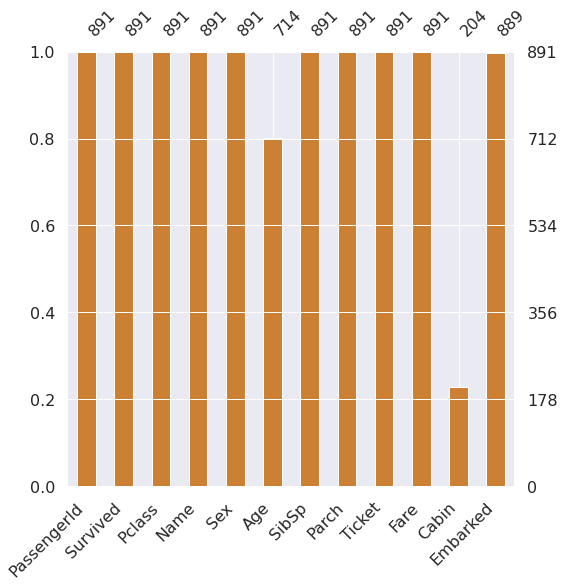

In [26]:
msno.bar(df=df_train.iloc[:,:],figsize = (8,8), color=(0.8,0.5,0.2))

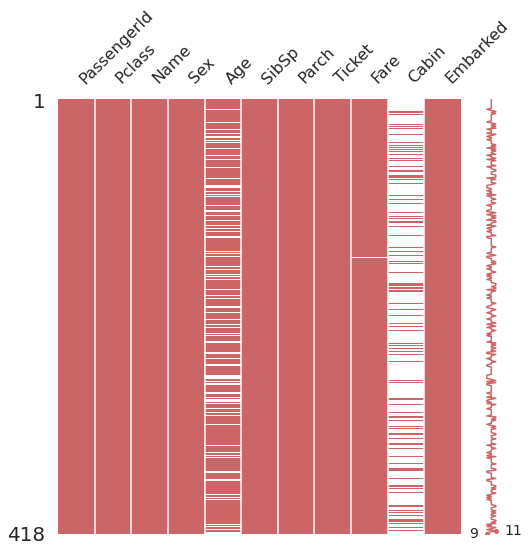

In [27]:
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color=[0.8,0.4,0.4])

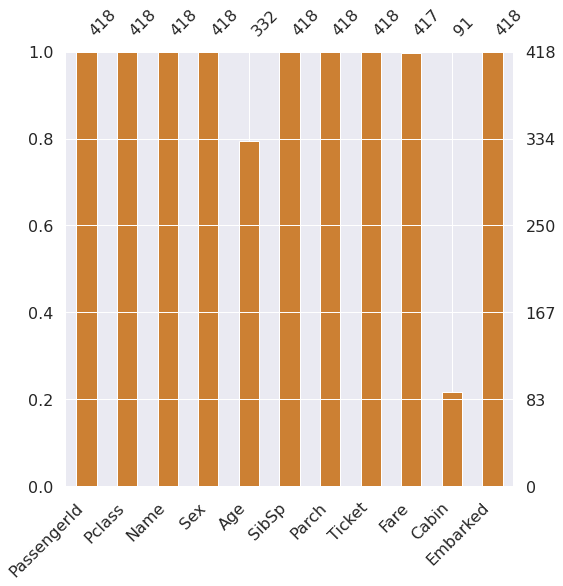

In [28]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))

## 2-2. Target Label 확인
- Target Label이 어떤 distribution을 가지고 있는지 확인
- binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

# 3. EDA

# 4. Feature Engineering

# 5. Model 만들기

# Model 학습 및 예측

# Model 평가